### Build a Product Recommendation System by using Collaborative filtering 

##### Product recommender system
A product recommender system is a system with the goal of predicting and compiling a list of items that a customer is likely to purchase

Various business use cases:
- music streaming service
- e-commerce company, Amazon, utilizes recommendater systems to predict and show a list of products that a customer is likely to purchase
- media service provider, Netflix, uses recommender systems to recommend movies or TV shows for individual users that they are likely to watch

The usage of a recommender system does not stop here. It can also be used to recommend related articles, news, or books to users

**There are typically two ways to produce a list of recommendations:**

- Collaborative filtering 
- Content-based filtering

###### Collaborative filtering
The collaborative filtering method is based on previous user behaviors, such as pages that they viewed, products that they purchased, or ratings that they have given to different items.
**We will learn how to collaborative filtering during this class**

The basic **assumption** behind the collaborative filtering method is that those who have viewed or purchased similar contents or products in the past are likely to view or purchase similar kinds of contents or products in the future

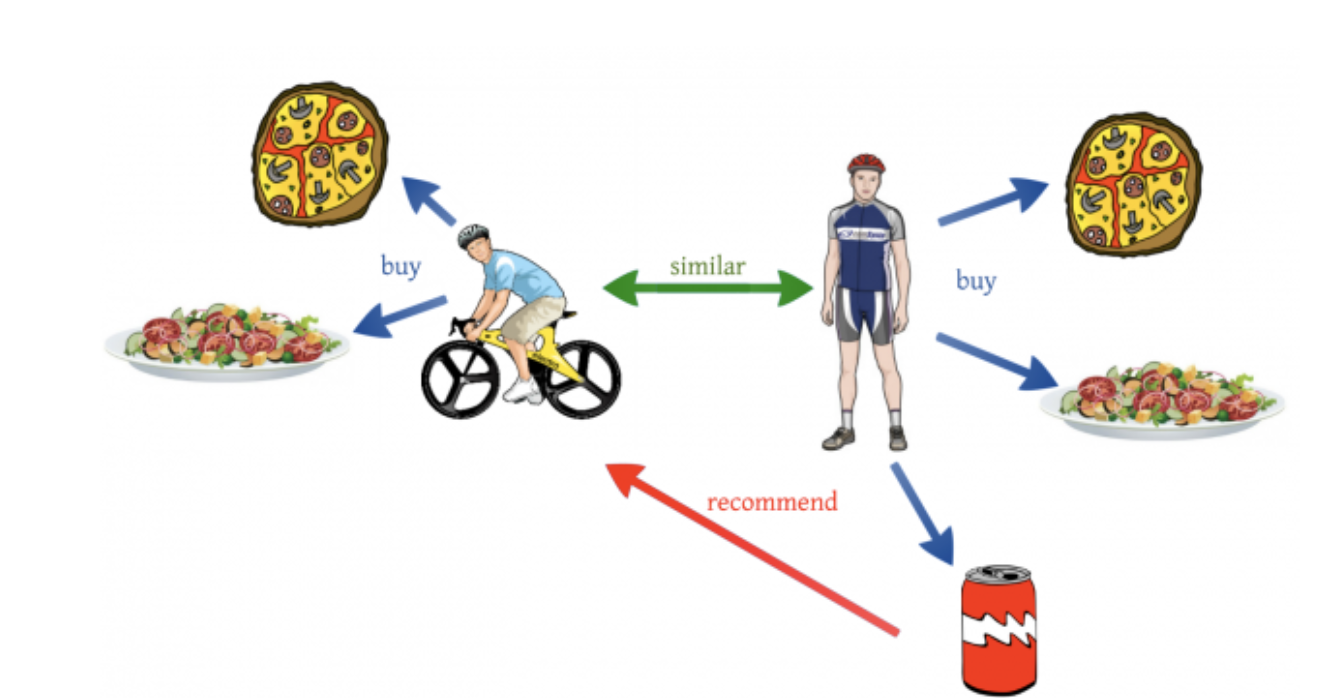

###### Content-based filtering
Content-based filtering, on the other hand, produces a list of recommendations based on the characteristics of an item or a user

The basic **assumption** behind the content-based filtering method is that the users are likely to view or purchase items that are similar to those items that they have bought or viewed in the past. For example, if a user has listened to some songs in the past, then the content-based filtering method will recommend similar kinds of songs that share similar characteristics to those songs that the user has already listened to. 

The content-based recommendation engine will only recommend articles related to these categories and may never recommend anything in other categories as the user never viewed those articles before. This problem can be solved using another variant of recommendation algorithm known as Collaborative Filtering.

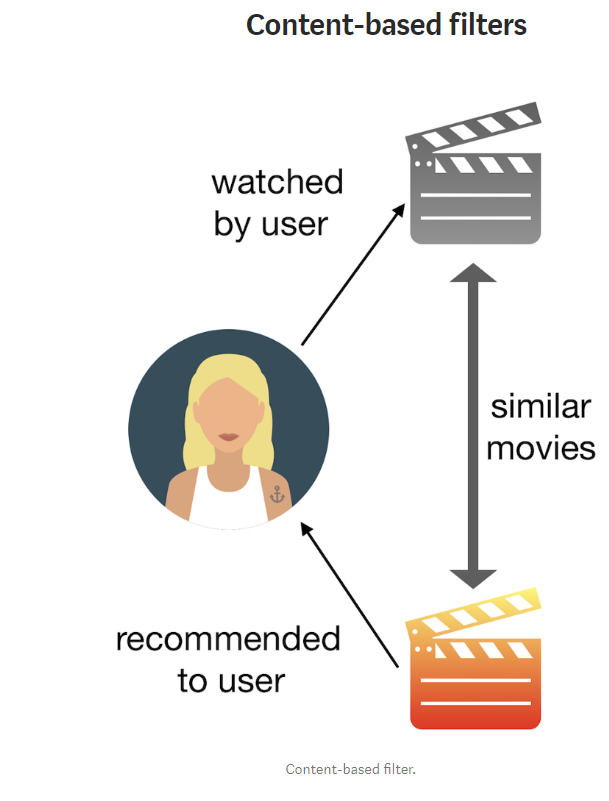

###### user-to-item matrix
The first step to implementing a collaborative filtering algorithm for a product recommendation system is building a user-to-item matrix. A user-to-item matrix comprises individual users in the rows and individual items in the columns:

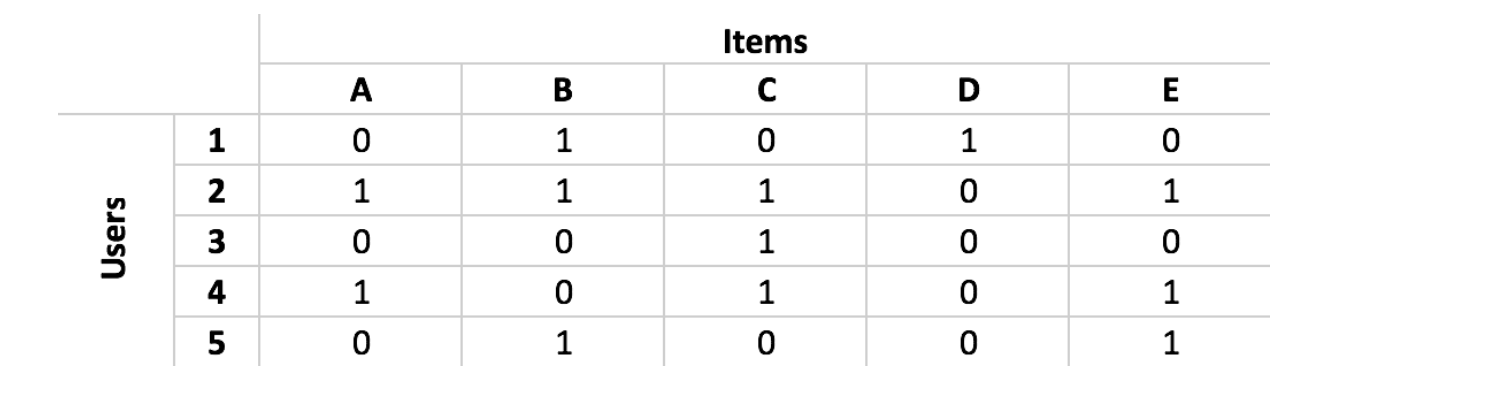

The rows in this matrix represent each user and the columns represent each item. The values in each cell represent whether the given user bought the given item or not

With this user-to-item matrix, the next step to building a collaborative filtering-based product recommender system is to compute similarities between users. To measure the similarities, **cosine similarity** is frequently used. The equation for computing the cosine similarity between two users looks as follows:

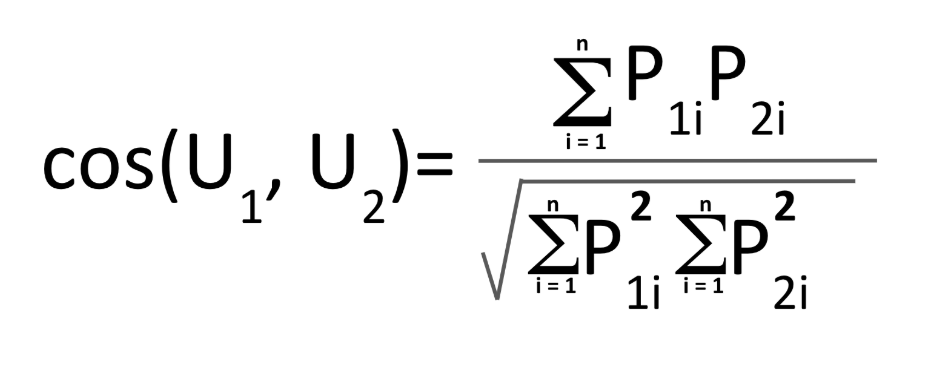

In this equation, U1 and U2 represent user 1 and user 2. P1i and P2i represent each product, i, that user 1 and user 2 have bought

### Case Study: Building a product recommendation algorithm with Python

#### Step one: Load data into Python Pandas DataFrame

Pandas stands for “Python Data Analysis Library”. It is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

In [2]:
import pandas as pd
%matplotlib inline
# use the %matplotlib inline command to show plots on the Jupyter Notebook
import matplotlib.pyplot as plt

df = pd.read_csv('onlinepurchase_clean.csv', sep='|')

#### Step Two: Examine the data

In [4]:
df.shape

(763716, 9)

In [5]:
list(df.columns)

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'Invoice_time',
 'Price',
 'CustomerID',
 'Country',
 'Purchase_dt']

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt
0,493410,TEST001,This is a test product.,5,2010-01-04 9:24,4.50,12346.0,United Kingdom,2010-01-04
1,493412,TEST001,This is a test product.,5,2010-01-04 9:53,4.50,12346.0,United Kingdom,2010-01-04
2,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28,2.55,14590.0,United Kingdom,2010-01-04
3,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28,4.25,14590.0,United Kingdom,2010-01-04
4,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28,2.55,14590.0,United Kingdom,2010-01-04


#### Step Three: Clean the data

**Remove purchase records with Quantity <= 0**

In [33]:
df = df.loc[df['Quantity'] > 0]
df

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt
0,493410,TEST001,This is a test product.,5,2010-01-04 9:24,4.50,12346.0,United Kingdom,2010-01-04
1,493412,TEST001,This is a test product.,5,2010-01-04 9:53,4.50,12346.0,United Kingdom,2010-01-04
2,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28,2.55,14590.0,United Kingdom,2010-01-04
3,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28,4.25,14590.0,United Kingdom,2010-01-04
4,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28,2.55,14590.0,United Kingdom,2010-01-04
...,...,...,...,...,...,...,...,...,...
763711,493407,21993,FLORAL FOLK STATIONERY SET,1,2011-12-23 16:04,2.95,17867.0,United Kingdom,2011-12-23
763712,493407,21992,VINTAGE PAISLEY STATIONERY SET,1,2011-12-23 16:04,2.95,17867.0,United Kingdom,2011-12-23
763713,493407,21991,BOHEMIAN COLLAGE STATIONERY SET,1,2011-12-23 16:04,2.95,17867.0,United Kingdom,2011-12-23
763714,493407,21034,REX CASH+CARRY JUMBO SHOPPER,10,2011-12-23 16:04,0.95,17867.0,United Kingdom,2011-12-23


In [34]:
df['Quantity'].describe()

count    763716.00000
mean         13.53435
std         147.62823
min           1.00000
25%           2.00000
50%           6.00000
75%          12.00000
max       80995.00000
Name: Quantity, dtype: float64

**Drop NA:**

In [35]:
df = df.loc[df['CustomerID'].notnull()]

In [36]:
df.shape

(763716, 9)

In [37]:
df.head()

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt
0,493410,TEST001,This is a test product.,5,2010-01-04 9:24,4.50,12346.0,United Kingdom,2010-01-04
1,493412,TEST001,This is a test product.,5,2010-01-04 9:53,4.50,12346.0,United Kingdom,2010-01-04
2,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28,2.55,14590.0,United Kingdom,2010-01-04
3,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28,4.25,14590.0,United Kingdom,2010-01-04
4,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28,2.55,14590.0,United Kingdom,2010-01-04


In [38]:
df.to_csv('onlinetrans.csv',sep = '|', index=False)

#### Step Four: Building a customer-item matrix:

Transform the data into a customer-item matrix, where each row represents a customer and the columns correspond to different products

In [8]:
customer_item_matrix = df.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)
customer_item_matrix.head()
#we now have a matrix where each row represents the total quantities bought for each product for each customer

StockCode,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,BANK CHARGES,C2,D,DOT,M,PADS,POST,SP1002,TEST001,TEST002
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,1.0
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


Let's 0-1 encode this data, so that the value of 1 means that the given product was purchased by the given customer, 
and the value of 0 means that the given product was never purchased by the given customer

In [9]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.head()

StockCode,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,BANK CHARGES,C2,D,DOT,M,PADS,POST,SP1002,TEST001,TEST002
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


User-based collaborative filtering and recommendations

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix)
)
# This function computes pairwise cosine similarities between the samples and outputs the results as an array type.
user_user_sim_matrix
#Then, we create a pandas DataFrame with this output array and store it into a variable named user_user_sim_matrix, 
# which stands for user-to-user similarity matrix.

,0,1,2,3,4,5,6,7,8,9,...,5822,5823,5824,5825,5826,5827,5828,5829,5830,5831
0,1.000000,0.000000,0.000000,0.131060,0.000000,0.000000,0.023002,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070535,0.000000
1,0.000000,1.000000,0.053452,0.045502,0.043214,0.038881,0.031944,0.055728,0.023395,0.090351,...,0.037987,0.000000,0.067344,0.064820,0.102869,0.113961,0.067344,0.000000,0.076186,0.024398
2,0.000000,0.053452,1.000000,0.017025,0.048507,0.000000,0.023905,0.000000,0.026261,0.067612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.138580,0.000000,0.000000,0.000000,0.054772
3,0.131060,0.045502,0.017025,1.000000,0.041292,0.037152,0.152617,0.071000,0.044710,0.057555,...,0.054447,0.000000,0.032174,0.020646,0.049147,0.140654,0.016087,0.000000,0.062399,0.038854
4,0.000000,0.043214,0.048507,0.041292,1.000000,0.000000,0.028989,0.050572,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.058824,0.000000,0.038782,0.000000,0.000000,0.029630,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,0.000000,0.113961,0.138580,0.140654,0.038782,0.034893,0.140153,0.066683,0.125976,0.018019,...,0.034091,0.044348,0.030218,0.077563,0.015386,1.000000,0.090655,0.015386,0.110698,0.087581
5828,0.000000,0.067344,0.000000,0.016087,0.000000,0.041239,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.090655,1.000000,0.054554,0.069264,0.120761
5829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034503,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.015386,0.054554,1.000000,0.105802,0.026352
5830,0.070535,0.076186,0.000000,0.062399,0.029630,0.026660,0.087612,0.000000,0.016042,0.082602,...,0.000000,0.000000,0.069264,0.000000,0.070535,0.110698,0.069264,0.105802,1.000000,0.066915


Since each column and each row index stand for individual customers, we are going to rename the index and columns

In [11]:
customer_item_matrix.index

Float64Index([12346.0, 12347.0, 12348.0, 12349.0, 12350.0, 12351.0, 12352.0,
              12353.0, 12354.0, 12355.0,
              ...
              18278.0, 18279.0, 18280.0, 18281.0, 18282.0, 18283.0, 18284.0,
              18285.0, 18286.0, 18287.0],
             dtype='float64', name='CustomerID', length=5832)

In [12]:
user_user_sim_matrix.columns

RangeIndex(start=0, stop=5832, step=1)

In [13]:
user_user_sim_matrix.columns = customer_item_matrix.index
user_user_sim_matrix.index = customer_item_matrix.index

Let's take a closer look at this user-to-user similarity matrix:

- the cosine similarity measure between customers 12347 and 12348 is 0.053452. 
- On the other hand, the cosine similarity between customers 12347 and 12349 is 0.045502. 
- This suggests that customer 12348 is more similar to customer 12347 than customer 12349 is to the customer 12347

In [14]:
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12351.0,12352.0,12353.0,12354.0,12355.0,...,18278.0,18279.0,18280.0,18281.0,18282.0,18283.0,18284.0,18285.0,18286.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.00000,0.000000,0.000000,0.131060,0.000000,0.000000,0.023002,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.070535,0.000000
12347.0,0.00000,1.000000,0.053452,0.045502,0.043214,0.038881,0.031944,0.055728,0.023395,0.090351,...,0.037987,0.0,0.067344,0.064820,0.102869,0.113961,0.067344,0.0,0.076186,0.024398
12348.0,0.00000,0.053452,1.000000,0.017025,0.048507,0.000000,0.023905,0.000000,0.026261,0.067612,...,0.000000,0.0,0.000000,0.000000,0.000000,0.138580,0.000000,0.0,0.000000,0.054772
12349.0,0.13106,0.045502,0.017025,1.000000,0.041292,0.037152,0.152617,0.071000,0.044710,0.057555,...,0.054447,0.0,0.032174,0.020646,0.049147,0.140654,0.016087,0.0,0.062399,0.038854
12350.0,0.00000,0.043214,0.048507,0.041292,1.000000,0.000000,0.028989,0.050572,0.000000,0.000000,...,0.000000,0.0,0.000000,0.058824,0.000000,0.038782,0.000000,0.0,0.029630,0.000000


#### Step Five: Generate recommendation list:

These pairwise cosine similarity measures are what we are going to use for product recommendations.
Let's work by picking one customer as an example

In [15]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
12568.0    0.216930
12814.0    0.171499
12503.0    0.171499
16886.0    0.171499
             ...   
14959.0    0.000000
14960.0    0.000000
14962.0    0.000000
14964.0    0.000000
18287.0    0.000000
Name: 12350.0, Length: 5832, dtype: float64

Let's pick customer 12350 and discuss how we can recommend products to 12568 by using these results. The strategy is as follows: 

First, we need to identify the items that the customers 12350 and 12568 have already bought. Then, we are going to find the products that the target customer 12568 has not purchased, but customer 12350 has. 

Since these two customers have bought similar items in the past, we are going to assume that the target customer 12568 has a high chance of purchasing the items that he or she has not bought, but customer 12350 has bought. Lastly, we are going to use this list of items and recommend them to the target customer 12568.

In [16]:
customer_item_matrix

StockCode,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,BANK CHARGES,C2,D,DOT,M,PADS,POST,SP1002,TEST001,TEST002
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18284.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18285.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
customer_item_matrix.loc[12350.0].to_numpy().nonzero()

(array([ 172,  179,  556, 1104, 1120, 1122, 1161, 1167, 1528, 1582, 1713,
        1718, 1780, 3257, 3277, 3381, 4585]),)

In [18]:
customer_item_matrix.loc[12350.0].iloc[customer_item_matrix.loc[12350.0].to_numpy().nonzero()].index

Index(['20615', '20652', '21171', '21832', '21864', '21866', '21908', '21915',
       '22348', '22412', '22551', '22557', '22620', '79066K', '79191C',
       '84086C', 'POST'],
      dtype='object', name='StockCode')

In [19]:
items_bought_by_A = set(customer_item_matrix.loc[12350.0].iloc[
    customer_item_matrix.loc[12350.0].to_numpy().nonzero()].index) 
items_bought_by_A

{'20615',
 '20652',
 '21171',
 '21832',
 '21864',
 '21866',
 '21908',
 '21915',
 '22348',
 '22412',
 '22551',
 '22557',
 '22620',
 '79066K',
 '79191C',
 '84086C',
 'POST'}

apply the same code for the target customer 12568

In [20]:
items_bought_by_B = set(customer_item_matrix.loc[12568.0].iloc[
    customer_item_matrix.loc[12568.0].to_numpy().nonzero()
].index)
items_bought_by_B

{'16161P', '20676', '22348', '47570', 'POST'}

Using a simple set operation, we can find the items that customer 12350 has bought, but customer 12568 has not

In [21]:
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B
items_to_recommend_to_B

{'20615',
 '20652',
 '21171',
 '21832',
 '21864',
 '21866',
 '21908',
 '21915',
 '22412',
 '22551',
 '22557',
 '22620',
 '79066K',
 '79191C',
 '84086C'}

Get the descriptions of these items

In [22]:
df.loc[
    df['StockCode'].isin(items_to_recommend_to_B), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
21171,BATHROOM METAL SIGN
21864,UNION JACK FLAG PASSPORT COVER
21908,CHOCOLATE THIS WAY METAL SIGN
21832,CHOCOLATE CALCULATOR
20652,BLUE SPOTTY LUGGAGE TAG
20615,BLUE SPOTTY PASSPORT COVER
79066K,RETRO MOD TRAY
21866,UNION JACK FLAG LUGGAGE TAG
79191C,RETRO PLASTIC ELEPHANT TRAY


This is how to use a user-based collaborative filtering algorithm, you can easily do product recommendations for target customers
However, there is one main disadvantage of using user-based collaborative filtering. As we have seen in this exercise, recommendations are based on the individual customer's purchase history. For new customers, we are not going to have enough data to compare these new customers against the others. In order to handle this problem, we can use item-based collaborative filtering

Practice:

Pick another customer id 12347, and generate the recommendation for the customer has the highest cosine similarity with 12347

In [23]:
user_user_sim_matrix.loc[12347.0].sort_values(ascending=False)

CustomerID
12347.0    1.000000
17396.0    0.264689
13324.0    0.222718
13759.0    0.218218
14646.0    0.207344
             ...   
17136.0    0.000000
15175.0    0.000000
17134.0    0.000000
17133.0    0.000000
12346.0    0.000000
Name: 12347.0, Length: 5832, dtype: float64

In [24]:
items_brought_by_12347 = set(customer_item_matrix.loc[12347].iloc[customer_item_matrix.loc[12347].to_numpy().nonzero()].index)
items_brought_by_12347

{'16008',
 '17021',
 '20665',
 '20712',
 '20716',
 '20719',
 '20780',
 '20782',
 '20966',
 '20985',
 '21035',
 '21041',
 '21064',
 '21144',
 '21154',
 '21171',
 '21265',
 '21372',
 '21578',
 '21579',
 '21636',
 '21731',
 '21739',
 '21741',
 '21791',
 '21832',
 '21975',
 '21976',
 '22045',
 '22131',
 '22134',
 '22195',
 '22196',
 '22212',
 '22244',
 '22245',
 '22252',
 '22331',
 '22371',
 '22372',
 '22374',
 '22375',
 '22376',
 '22417',
 '22418',
 '22422',
 '22423',
 '22432',
 '22492',
 '22494',
 '22497',
 '22530',
 '22534',
 '22550',
 '22561',
 '22621',
 '22697',
 '22698',
 '22699',
 '22709',
 '22725',
 '22726',
 '22727',
 '22728',
 '22729',
 '22771',
 '22772',
 '22773',
 '22774',
 '22775',
 '22805',
 '22821',
 '22945',
 '22992',
 '23076',
 '23084',
 '23146',
 '23147',
 '23162',
 '23170',
 '23171',
 '23172',
 '23173',
 '23174',
 '23175',
 '23177',
 '23271',
 '23297',
 '23308',
 '23316',
 '23420',
 '23421',
 '23422',
 '23480',
 '23497',
 '23503',
 '23506',
 '23508',
 '23552',
 '35471D',

In [25]:
items_brought_by_17396 = set(customer_item_matrix.loc[17396].iloc[customer_item_matrix.loc[17396].to_numpy().nonzero()].index)
items_brought_by_17396

{'22141',
 '22142',
 '22144',
 '22191',
 '22192',
 '22193',
 '22423',
 '22697',
 '22698',
 '22699',
 '22725',
 '22726',
 '22727',
 '22728',
 '22729',
 '22730',
 '22775',
 '22813',
 '23170',
 '23171',
 '23172',
 '23173',
 '23174',
 '23175',
 '23245',
 '35004C',
 '48129',
 '48187',
 'M'}

In [26]:
items_to_recommend_17396 = items_brought_by_12347 - items_brought_by_17396
items_to_recommend_17396

{'16008',
 '17021',
 '20665',
 '20712',
 '20716',
 '20719',
 '20780',
 '20782',
 '20966',
 '20985',
 '21035',
 '21041',
 '21064',
 '21144',
 '21154',
 '21171',
 '21265',
 '21372',
 '21578',
 '21579',
 '21636',
 '21731',
 '21739',
 '21741',
 '21791',
 '21832',
 '21975',
 '21976',
 '22045',
 '22131',
 '22134',
 '22195',
 '22196',
 '22212',
 '22244',
 '22245',
 '22252',
 '22331',
 '22371',
 '22372',
 '22374',
 '22375',
 '22376',
 '22417',
 '22418',
 '22422',
 '22432',
 '22492',
 '22494',
 '22497',
 '22530',
 '22534',
 '22550',
 '22561',
 '22621',
 '22709',
 '22771',
 '22772',
 '22773',
 '22774',
 '22805',
 '22821',
 '22945',
 '22992',
 '23076',
 '23084',
 '23146',
 '23147',
 '23162',
 '23177',
 '23271',
 '23297',
 '23308',
 '23316',
 '23420',
 '23421',
 '23422',
 '23480',
 '23497',
 '23503',
 '23506',
 '23508',
 '23552',
 '35471D',
 '47559B',
 '47567B',
 '47580',
 '47594A',
 '47599A',
 '51014A',
 '51014C',
 '51014L',
 '71477',
 '72819',
 '84558A',
 '84559A',
 '84559B',
 '84625A',
 '84625C

In [27]:
df.loc[df['StockCode'].isin(items_to_recommend_17396),['StockCode','Description']].drop_duplicates().set_index('StockCode')

,Description
StockCode,
84997B,RED 3 PIECE MINI DOTS CUTLERY SET
84997C,BLUE 3 PIECE MINI DOTS CUTLERY SET
84997D,PINK 3 PIECE MINI DOTS CUTLERY SET
84991,60 TEATIME FAIRY CAKE CASES
84559A,3D SHEET OF DOG STICKERS
...,...
23480,MINI LIGHTS WOODLAND MUSHROOMS
23497,CLASSIC CHROME BICYCLE BELL
23497,CLASSIC CROME BICYCLE BELL


#### Automation

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

def get_user_user_sim_matrix(customer_item_matrix):
    
    user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
    user_user_sim_matrix.columns = customer_item_matrix.index
    user_user_sim_matrix.index = customer_item_matrix.index
    
    return user_user_sim_matrix  

In [29]:
def get_recommendations(target_id, user_user_sim_matrix, customer_item_matrix):


    sim_rank = user_user_sim_matrix.loc[target_id].sort_values(ascending=False)
    

    sim_userid = sim_rank.index[1]
    cos_value = sim_rank.iloc[1]
    

    items_bought_by_target_id = set(customer_item_matrix.loc[target_id].iloc[
    customer_item_matrix.loc[target_id].to_numpy().nonzero()[0]].index) 
    

    items_bought_by_sim_userid = set(customer_item_matrix.loc[sim_userid].iloc[
    customer_item_matrix.loc[sim_userid].to_numpy().nonzero()[0]].index) 
    

    items_to_recommend_to_target_id = items_bought_by_sim_userid - items_bought_by_target_id
    

    recommend_df = pd.DataFrame(columns=['target_id', 'sim_userid', 'cos_value'], index=range(len(items_to_recommend_to_target_id)))
    
    recommend_df['target_id'] = target_id
    recommend_df['sim_userid'] = sim_userid
    recommend_df['cos_value'] = cos_value

    recommend_df['recommend_prod'] = list(items_to_recommend_to_target_id)
    
    return recommend_df

In [30]:
user_user_sim_matrix = get_user_user_sim_matrix(customer_item_matrix)

In [31]:
get_recommendations(12758.0, user_user_sim_matrix, customer_item_matrix)

,target_id,sim_userid,cos_value,recommend_prod
0,12758.0,12766.0,0.387695,22496
1,12758.0,12766.0,0.387695,21358
2,12758.0,12766.0,0.387695,21108
3,12758.0,12766.0,0.387695,22313
4,12758.0,12766.0,0.387695,22114
...,...,...,...,...
174,12758.0,12766.0,0.387695,21984
175,12758.0,12766.0,0.387695,22489
176,12758.0,12766.0,0.387695,21915
177,12758.0,12766.0,0.387695,22457
